Number of duplicated data arrays 9144
Parameters of the data
--------------------------------------------
Total number of cases are 270514
Number of Non-fraud cases are 270054
Number of Non-fraud cases are 460
Percentage of fraud cases is 0.17 %
--------------------------------------------
Epoch 1/6
17313/17313 [==============================] - 28s 2ms/step - loss: 0.0327 - accuracy: 0.9980 - val_loss: 0.0094 - val_accuracy: 0.9994
Epoch 2/6
17313/17313 [==============================] - 28s 2ms/step - loss: 0.0132 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 0.9995
Epoch 3/6
17313/17313 [==============================] - 28s 2ms/step - loss: 0.0089 - accuracy: 0.9991 - val_loss: 0.0035 - val_accuracy: 0.9991
Epoch 4/6
17313/17313 [==============================] - 30s 2ms/step - loss: 0.0076 - accuracy: 0.9991 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 5/6
17313/17313 [==============================] - 29s 2ms/step - loss: 0.0071 - accuracy: 0.9992 - val_loss: 0.0046 - 

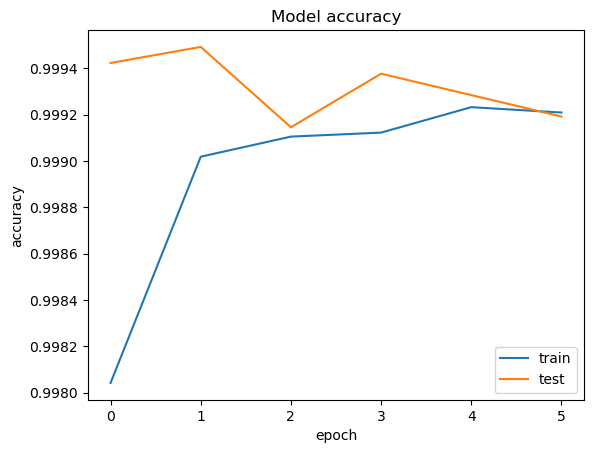

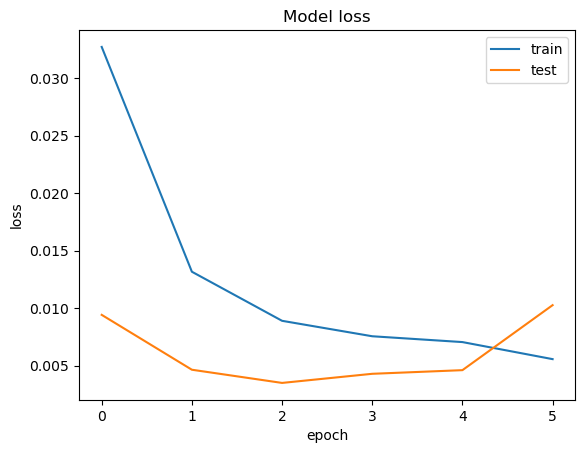

Max val_acc achieved: 99.95 %
Max acc achieved: 99.92 %


In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # data split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

#%% LOAD DATA + STATISTICS
"Loading the data and examining it"

df = pd.read_csv('creditcard.csv')

#drop time variable (not relevant) and duplicated data
df.drop('Time', axis = 1, inplace = True)
print('Number of duplicated data arrays', df.duplicated().sum())

df.drop_duplicates(keep=False,inplace=True)

#check data load with a print
#print(df.head()) 

cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('Parameters of the data')
print('--------------------------------------------')
print('Total number of cases are', cases)
print('Number of Non-fraud cases are', nonfraud_count)
print('Number of Non-fraud cases are',fraud_count)
print('Percentage of fraud cases is' ,fraud_percentage , '%')
print('--------------------------------------------')

"NB: fraud/nonfraud ratio is only 0.17%"

nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

"""
print("Data statistics")
print('--------------------------------------------')
print('Non-fraud stats')
print(nonfraud_cases.Amount.describe())
print('--------------------------------------------')
print('Fraud stats')
print(fraud_cases.Amount.describe())
print('--------------------------------------------')
"""
#%% DATA SPLIT
"DATA SPLIT"

Vs = df.drop('Class', axis = 1).values #Vs vsalues
y = df['Class'].values #Fraud/non-fraud array

normalise = False

if normalise:
    #print('First few values BEFORE normalisation') 
    # print(Vs[0:5,-1])
    # plt.plot(Vs[0:200,-1])
    #plt.show()
    Vs[:,-1] = Vs[:,-1]/np.linalg.norm(Vs[:,-1])
#truncate data for testing

testtotrain = 0.2
X_train, X_test, y_train, y_test = train_test_split(Vs, y, test_size = testtotrain, random_state = 0)

#%% CLASSICAL LAYER + MODEL

tf.keras.backend.set_floatx('float64')

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=50, activation='swish'))
model.add(tf.keras.layers.Dense(units=50, activation='swish'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])    
history = model.fit(X_train, y_train, batch_size = 10, epochs = 6,validation_split=0.2)

#%%EVALUATION 

# Plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# Plot history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

print('Max val_acc achieved: %.2f' %(max(history.history['val_accuracy'])*100), '%')
print('Max acc achieved: %.2f' %(max(history.history['accuracy'])*100), '%')